In [2]:
!pip install numpy matplotlib

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.8 MB 15.2 MB/s eta 0:00:01
   ------------------- -------------------- 6.3/12.8 MB 15.4 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.8 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 15.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.1 MB 14.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 17.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 18.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 16.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------

In [4]:
#LGbeam histogram
#保存ファイルはホームからhisで検索
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 1. 環境設定 (Juliaコードの出力設定に基づく) ---
# Juliaシミュレーション結果が保存されているディレクトリ
# (Juliaコード内の save_path と一致させる必要があります)
SAVE_DIR = "C:\\Users\\setol\\OneDrive\\ドキュメント\\simdata" 
# 画像を保存するためのディレクトリ
OUTPUT_DIR = os.path.join(os.getcwd(), "LG_histograms") 

# シミュレーションのパラメータ
P_RANGE = range(4) # 0から3
L_RANGE = range(4) # 0から3
POWER_MW = 1000# ls_pow = 10e-3 (10mW)
RADIUS_NM = 2500   # r_p = 100e-9 (100nm)

# 出力ディレクトリが存在しない場合は作成
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"ヒストグラム画像を '{OUTPUT_DIR}' に保存します。")

# --- 2. 描画スタイル設定 (科学論文品質) ---
# 論文図版に合わせたフォントとスタイル設定
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.family': 'serif',
    'mathtext.fontset': 'cm' 
})

# --- 3. 全モードのループ処理と描画実行 ---

for p_idx in P_RANGE:
    for l_idx in L_RANGE:
        
        # 3.1. ファイルパスの動的構築
        # Juliaコードのファイル名形式: LG_pX_lY_...nm.txt
        filename_base = f"x_LG_p{p_idx}_l{l_idx}_{POWER_MW}mW_{RADIUS_NM}nm"
        file_path = os.path.join(SAVE_DIR, f"{filename_base}.txt")

        print(f"\n処理中: p={p_idx}, l={l_idx} | ファイル: {file_path}")

        # 3.2. データI/Oとエラーハンドリング
        try:
            # タブ区切り ('\t') のファイルを読み込み、Float64精度を維持 [1]
            data_2d = np.loadtxt(file_path, delimiter='\t', dtype=np.float64)
            
            # 2次元データを1次元にフラット化 (全ての粒子・全ての時間ステップを結合)
            x_data_1d = data_2d.flatten()
            
        except FileNotFoundError:
            print(f"警告: データファイルが見つかりません。スキップします。")
            continue
        except Exception as e:
            print(f"データ読み込み中に予期せぬエラーが発生しました: {e}")
            continue

        # 3.3. ヒストグラムの描画設定
        fig, ax = plt.subplots(figsize=(4.5, 3.5))

        # Matplotlib hist 関数による描画
        ax.hist(
            x_data_1d, 
            bins='auto',           # 統計的に最適なビン数を自動決定
            range=(-3.0, 3.0),     # 図2(d)に合わせて視覚範囲を統一
            density=False,         # Y軸は Occurrence [a.u.] (カウントベース) のためFalse [2]
            histtype='stepfilled', # 塗りつぶされた形状を再現 [2]
            color='#FF4500',       # Orangered (暖色)
            alpha=0.8,
            edgecolor='none'       # バーの境界線を取り除き、滑らかさを強調
        )

        # 3.4. 軸ラベルと体裁の調整
        # X軸ラベルはマイクロメートル単位であることを明示 (Juliaコードの変換に基づく)
        ax.set_xlabel(r'$x\ \mathrm{[\mu m]}$', labelpad=5)
        ax.set_ylabel('Occurrence [a.u.]', labelpad=5)
        ax.set_title(f'LG Mode $p={p_idx}$, $l={l_idx}$', fontsize=12)

        # 軸範囲と目盛りの調整
        ax.set_xlim(-3, 3) 
        # ax.set_ylim(bottom=0) # 必要に応じて設定
        ax.tick_params(direction='in', top=True, right=True)

        plt.tight_layout()
        
        # 3.5. 画像ファイルの保存
        output_filepath = os.path.join(OUTPUT_DIR, f"{filename_base}.png")
        plt.savefig(output_filepath, dpi=300)
        plt.close(fig) # メモリ節約のために図を閉じる
        
        print(f"-> 画像を保存しました: {os.path.basename(output_filepath)}")

print("\n--- 全16モードのヒストグラム描画と保存が完了しました ---")

ヒストグラム画像を 'C:\Users\setol\LG_histograms' に保存します。

処理中: p=0, l=0 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p0_l0_1000mW_2500nm.txt
-> 画像を保存しました: x_LG_p0_l0_1000mW_2500nm.png

処理中: p=0, l=1 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p0_l1_1000mW_2500nm.txt
警告: データファイルが見つかりません。スキップします。

処理中: p=0, l=2 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p0_l2_1000mW_2500nm.txt
警告: データファイルが見つかりません。スキップします。

処理中: p=0, l=3 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p0_l3_1000mW_2500nm.txt
警告: データファイルが見つかりません。スキップします。

処理中: p=1, l=0 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p1_l0_1000mW_2500nm.txt
警告: データファイルが見つかりません。スキップします。

処理中: p=1, l=1 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p1_l1_1000mW_2500nm.txt
警告: データファイルが見つかりません。スキップします。

処理中: p=1, l=2 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p1_l2_1000mW_2500nm.txt
警告: データファイルが見つかりません。スキップします。

処理中: p=1, l=3 | ファイル: C:\Users\setol\OneDrive\ドキュメント\simdata\x_LG_p1_l3_1000mW_2500nm.txt
警告: デー

データ読み込み成功。総データ点数: 1000010点


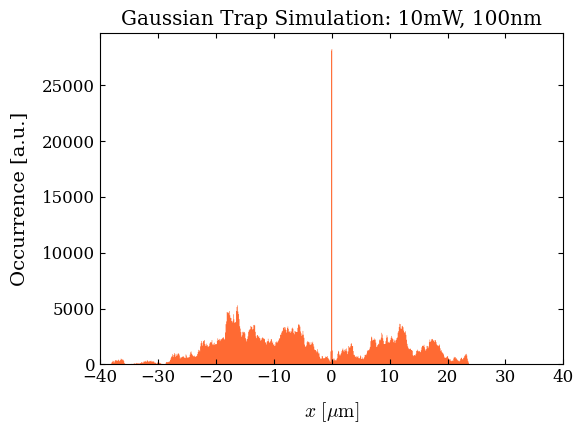


トラッピング位置分布の標準偏差 (um): 13.5126 um


In [13]:
#ガウシアンビームのヒストグラム
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# --- 1. データI/O設定 ---
# Juliaコードの save_path とファイル名を正確に設定
# Windowsパスの二重スラッシュまたはスラッシュを使用
SAVE_DIR = "C:\\Users\\setol\\OneDrive\\ドキュメント\\simdata"
# ファイル名は Julia コード内の writedlm で指定されています
FILENAME = "x_0.1mW_2.5e-7nm_sili2.txt" #変更必須
FILE_PATH = os.path.join(SAVE_DIR, FILENAME)


# --- 2. データ読み込み ---
try:
    # delimiter='\t' を指定し、タブ区切りファイルを読み込む
    # resultx の形状は (p_num, n+1) = (200, 60001)
    data_2d = np.loadtxt(FILE_PATH, delimiter='\t', dtype=np.float64)
    
    # 全ての粒子、全ての時間ステップのデータを1次元にフラット化
    x_data_1d = data_2d.flatten()
    print(f"データ読み込み成功。総データ点数: {len(x_data_1d)}点")
    
except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません。パスを確認してください: {FILE_PATH}")
    # Juliaシミュレーションのパラメータを再確認し、ファイル名を生成
    # 例: ls_pow=10e-3 (10mW), r_p=100e-9 (100nm)
    print(f"期待されるファイル名: {FILENAME}")
    exit()

# --- 3. 描画スタイル設定 (科学論文品質) ---
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'mathtext.fontset': 'cm'
})

# --- 4. ヒストグラムの描画 ---
fig, ax = plt.subplots(figsize=(6, 4.5))

# シミュレーション範囲に合わせて描画範囲を設定
# Juliaコードの ran=20um に基づき、X軸範囲を -20um から 20um に設定
PLOT_RANGE_UM = 40
BIN_WIDTH_UM = 0.1 # ビン幅を0.5 µmに設定
bins = np.arange(-PLOT_RANGE_UM, PLOT_RANGE_UM + BIN_WIDTH_UM, BIN_WIDTH_UM)

# Matplotlib hist 関数による描画 (図2(d)のスタイルを適用)
N_counts, edges, patches = ax.hist(
    x_data_1d, 
    bins=bins,           
    range=(-PLOT_RANGE_UM, PLOT_RANGE_UM),     
    density=False,         
    histtype='stepfilled', # 塗りつぶされた形状 [1]
    color='orangered',     
    alpha=0.8,
    edgecolor='none'       # バーの縦線を取り除く [2]
)

# --- 5. 軸ラベルと体裁の調整 ---
ax.set_xlabel(r'$x\ \mathrm{[\mu m]}$', labelpad=10)
ax.set_ylabel('Occurrence [a.u.]', labelpad=10)
ax.set_title(f'Gaussian Trap Simulation: {int(1000*10e-3)}mW, {int(1e9*100e-9)}nm')

ax.set_xlim(-PLOT_RANGE_UM, PLOT_RANGE_UM) 
ax.tick_params(direction='in', top=True, right=True)

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# 統計分析のための標準偏差計算
x_std_um = np.std(x_data_1d)
print(f"\nトラッピング位置分布の標準偏差 (um): {x_std_um:.4f} um")
# ----------------------------------------------------

In [6]:
!pip install seaborn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.0 MB 18.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 19.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 16.0 MB/s eta 0:00:00


データ読み込み成功。ファイル: x_LG_p0_l0_1000mW_100nm_noBM_single.txt
総データ点数: 1200001点


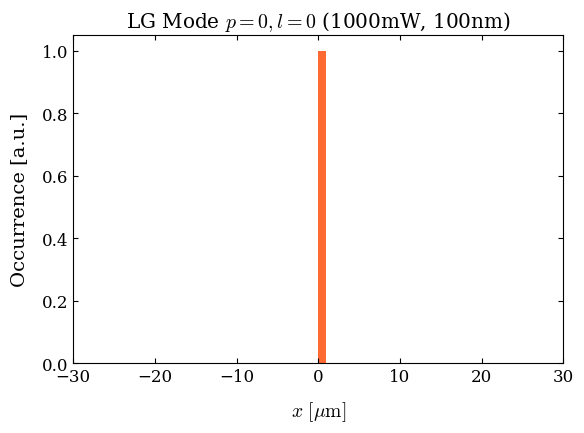


トラッピング位置分布の標準偏差 (um): 139.7205 um


In [32]:
# LGビームヒストグラム描画コード
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# --- ユーザー設定 (描画したいモードとJuliaコードの安定設定に合わせる) ---
P_INDEX = 0  # 描画したい半径方向モード数 p
L_INDEX = 0  # 描画したい方位角モード数 l

# Juliaコードの最新の安定設定値 (ファイル名生成に使用された値)
POWER_MW = 1000 # ls_pow * 1000 = 1000mW
RADIUS_NM = 100 # r_p * 1e9 = 100nm

# Juliaコードの save_path と一致させる必要があります (Windows絶対パス)
SAVE_DIR = "C:\\Users\\setol\\OneDrive\\ドキュメント\\simdata"
# -------------------------------------------------------------

# --- 1. ファイル名とパスの構築 ---
# Juliaコードのファイル名形式: LG_pX_lY_...nm.txt
filename_base = f"LG_p{P_INDEX}_l{L_INDEX}_{POWER_MW}mW_{RADIUS_NM}nm_noBM_single"
FILENAME = f"x_{filename_base}.txt"
FILE_PATH = os.path.join(SAVE_DIR, FILENAME)


# --- 2. データ読み込み ---
try:
    # タブ区切り ('\t') のファイルを読み込む
    data_2d = np.loadtxt(FILE_PATH, delimiter='\t', dtype=np.float64)
    
    # 全ての粒子、全ての時間ステップのデータを1次元にフラット化
    x_data_1d = data_2d.flatten()
    print(f"データ読み込み成功。ファイル: {FILENAME}")
    print(f"総データ点数: {len(x_data_1d)}点")
    
except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません。パスを確認してください: {FILE_PATH}")
    # 失敗した場合は終了
    exit()
except Exception as e:
    print(f"データ読み込み中に予期せぬエラーが発生しました: {e}")
    exit()

# --- 3. 描画スタイル設定 (科学論文品質) ---
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'mathtext.fontset': 'cm'
})

# --- 4. ヒストグラムの描画 ---
fig, ax = plt.subplots(figsize=(6, 4.5))

# シミュレーション範囲に合わせて描画範囲を設定 (ran=20um に基づき、トラップ周辺の ±3um を描画)
PLOT_RANGE_UM = 30
BIN_WIDTH_UM = 1# ビン幅を細かくして滑らかさを増す
bins = np.arange(-PLOT_RANGE_UM, PLOT_RANGE_UM + BIN_WIDTH_UM, BIN_WIDTH_UM)

# Matplotlib hist 関数による描画 (図2(d)のスタイルを適用)
N_counts, edges, patches = ax.hist(
    x_data_1d, 
    bins=bins, 
    range=(-PLOT_RANGE_UM, PLOT_RANGE_UM), 
    density=False, 
    histtype='stepfilled', 
    color='orangered', 
    alpha=0.8,
    edgecolor='none'
)

# --- 5. 軸ラベルと体裁の調整 ---
ax.set_xlabel(r'$x\ \mathrm{[\mu m]}$', labelpad=10)
ax.set_ylabel('Occurrence [a.u.]', labelpad=10)
ax.set_title(f'LG Mode $p={P_INDEX}, l={L_INDEX}$ ({POWER_MW}mW, {RADIUS_NM}nm)')

ax.set_xlim(-PLOT_RANGE_UM, PLOT_RANGE_UM) 
ax.tick_params(direction='in', top=True, right=True)

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# 統計分析のための標準偏差計算
x_std_um = np.std(x_data_1d)
print(f"\nトラッピング位置分布の標準偏差 (um): {x_std_um:.4f} um")
# ----------------------------------------------------
